In [4]:
import numpy as np
import h5py
import os
import cv2
from sklearn.decomposition import PCA
import ggmm.gpu as ggmm

from sklearn import svm
from sklearn.metrics import accuracy_score


import pandas as pd
from pandas import HDFStore, DataFrame
import pickle
#import pdb

In [2]:
dataset_dir = '../dataset_h5/'
skipped_indices = []
filename = 'images_224_delta_1.5.h5'
test_filename = 'images_224.h5'

In [5]:
# try:
#     labels_train = np.load("labels_train.npy")
#     fv = np.load("fisher_vector.npy")
# except FileNotFoundError:
#     h5f = h5py.File(os.path.join(dataset_dir,filename),'r')
#     skipped_indices, fv = process_images(h5f['data'])
#     labels_train = load_labels(skipped_indices, 'labels_train')
#     np.save("labels_train.npy",labels_train )
#     np.save("fisher_vector.npy",fv )
# 
# classifier = train(fv,labels_train)
# pickle.dump( classifier, open( "classifier.p", "wb" ) ) 
classifier = pickle.load( open( "classifier.p", "rb" ) )
try:
    labels_test = np.load("labels_test.npy")
    fv_test = np.load("fisher_vector_test.npy")
except FileNotFoundError:
    h5f_test = h5py.File(os.path.join(dataset_dir,test_filename),'r')
    skipped_indices_test, fv_test = process_images(h5f_test['data_test'])
    labels_test = load_labels(skipped_indices_test, 'labels_test')
    np.save("labels_test.npy",labels_test )
    np.save("fisher_vector_test.npy",fv_test )


accuracy_score(labels_test, classifier.predict(fv_test))

0.56685243761610682

In [11]:
import numpy as np
import h5py
import os
import cv2
from sklearn.decomposition import PCA
import ggmm.gpu as ggmm

from sklearn import svm
from sklearn.metrics import accuracy_score


import pandas as pd
from pandas import HDFStore, DataFrame
import pickle

from image_fisher_vector import ImageFisherVector as ifv

classifier =  pickle.load( open( "classifier.p", "rb" ) )
print("Loaded Classifier!")
gmm = ifv.load_gmm()


# image = cv2.imread("model.png")
# image_features = ifv.extract_image_features(image)

# if image_features is not None and image_features.shape[0] >= 64:
# 	image_features = ifv.reduce_features(image_features)
# else:
# 	print("Not enough features found by SIFT")


# fv = fisher_vector(image_features,gmm)

# classifier.decision_function(fv.reshape(1, -1))

#fv_test = np.load("fisher_vector_test.npy")
#confidence = classifier.decision_function(fv_test)

store = HDFStore('../dataset_h5/full_test_labels.h5')

labels_test = store['full_labels_test']
#labels_test['confidence'] = confidence



Loaded Classifier!
Loaded GMM Info!


/home/hii/anaconda3/envs/piqualenv/lib/python3.5/site-packages/ipykernel/__main__.py:44: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [41]:
top_confidence_good = labels_test.ix[labels_test.good == 0 ].sort_values(by='confidence', ascending=False)[:10]
top_confidence_good

,2,3,4,5,6,7,8,9,10,11,12,13,14,score,good,confidence
701126,1,4,15,51,48,15,5,2,1,0,40,0,892,4.563380,0,17.913098
843456,5,8,22,54,98,62,16,5,2,1,14,27,1148,4.926740,0,16.195771
209358,1,16,31,71,95,33,13,4,1,0,18,0,362,4.584906,0,16.055841
387042,3,12,11,55,84,50,23,5,1,0,18,29,547,4.959016,0,15.925109
933640,6,12,21,62,45,18,5,2,0,3,7,14,1341,4.339080,0,14.654343
398265,4,11,25,51,51,34,8,0,2,1,14,20,557,4.534759,0,14.374505
693484,0,4,10,48,60,13,7,2,1,2,14,0,871,4.775510,0,13.749099
278072,2,13,55,143,124,59,19,3,1,2,14,23,430,4.572447,0,12.996958
824633,8,12,24,49,39,19,1,1,0,0,20,49,1098,4.078431,0,11.874098
33403,1,5,8,34,44,27,10,4,2,0,38,0,128,4.985185,0,11.776946


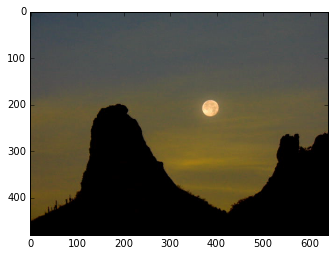

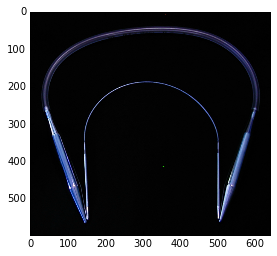

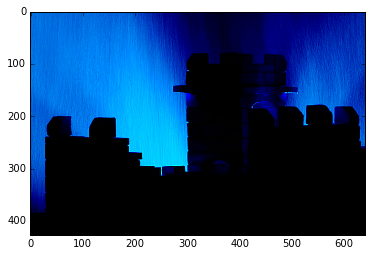

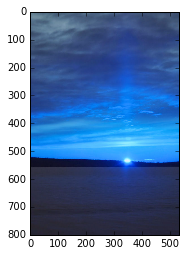

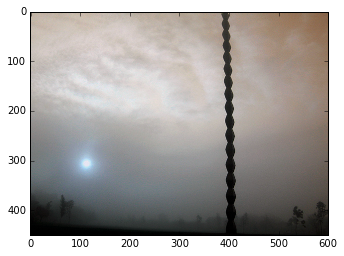

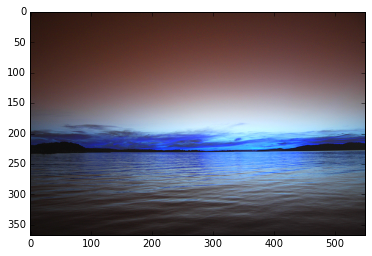

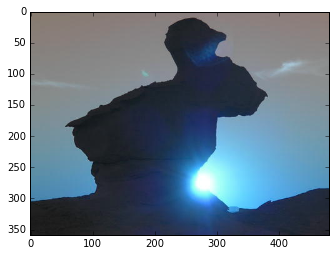

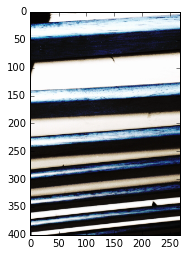

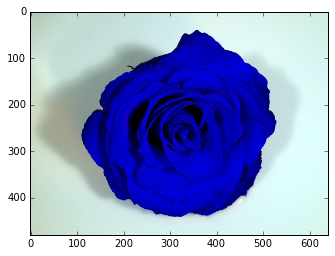

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt

ava_path = "../dataset/AVA/data/"
ava_data_path = os.path.join(os.getcwd(), ava_path)
i = 0
for index, row in top_confidence_good.iterrows():
    filename = "{0}.jpg".format(index)

    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    plt.imshow(image)
    plt.figure(i+1)
    i = i + 1